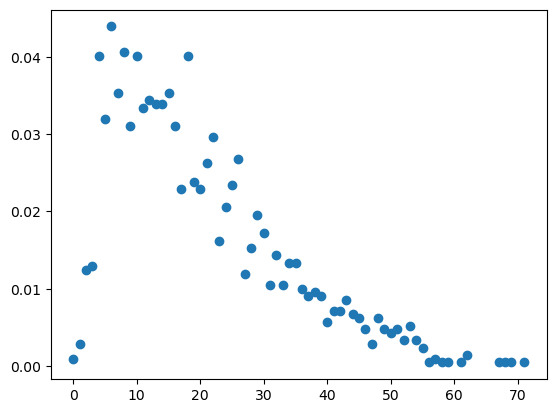

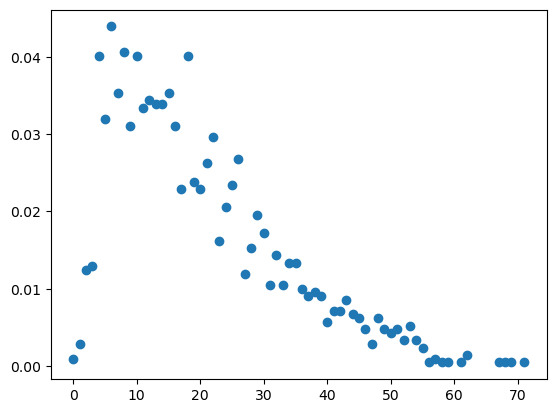

In [1]:
import stats
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../data/nyc.csv')
agent = stats.formulas(df)
# pdf
agent.pdf('Poverty',0)
plt.scatter(agent.vals,agent.probVector)

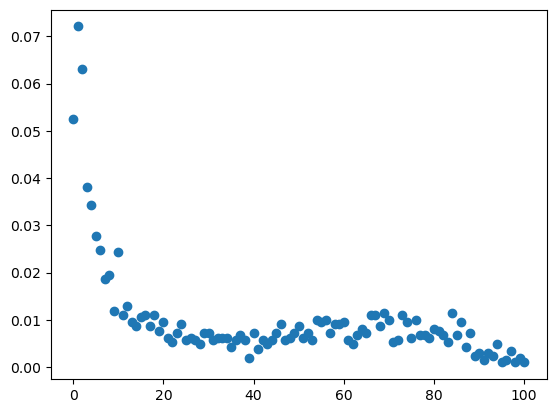

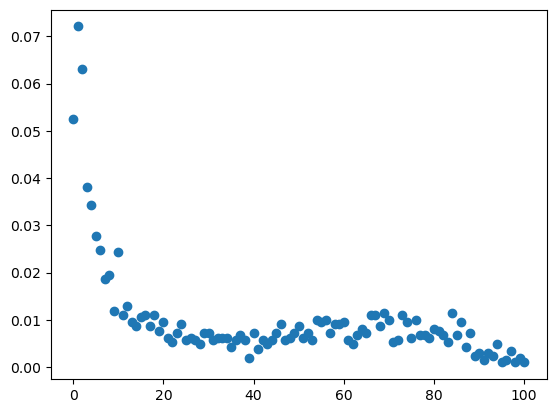

In [2]:
agent.pdf('White',0)
plt.scatter(agent.vals,agent.probVector)

In [3]:
# KNN
agent.set_x_y('White','Income')
agent.init_knn('County')
testNode = agent.nodeList[200]
agent.insert_knn(testNode)
# TODO: scatter plot node.x, node.y


/Users/kjams/Desktop/generalized_ai_research/notebooks/stats.py:330: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['node'] = nodeList


In [4]:
# agent.graph[(testNode.x,testNode.y)].append(testNode)
# x = agent.df['node'].tolist()
# agent.knn_predict(x)
#agent.knn_predict(testNode)

m = -0.1824739124121692 
b = 25.550393978858022


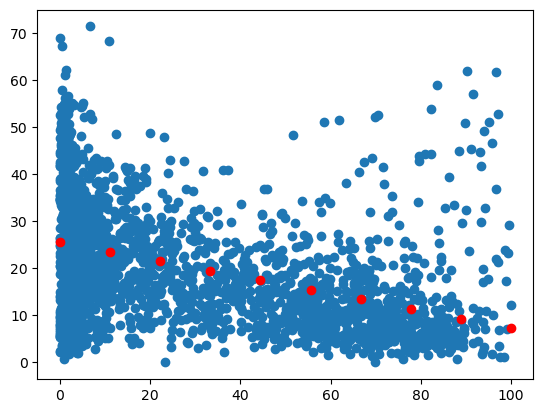

m = 0.06009790832789199 
b = 18.120197448809314


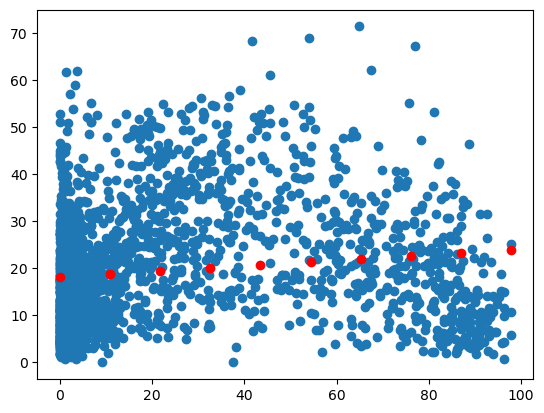

m = -0.003180318735982696 
b = 13.689999826918376


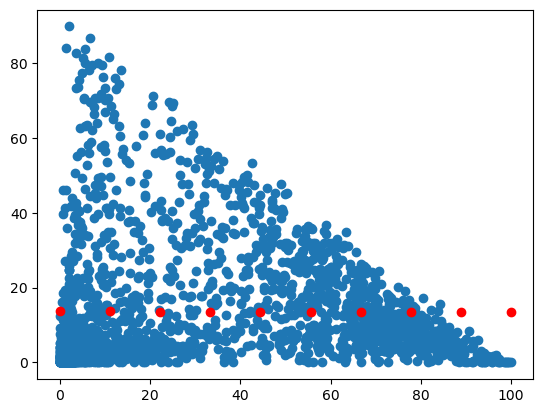

array([13.68999983, 13.65466295, 13.61932608, 13.5839892 , 13.54865233,
       13.51331545, 13.47797858, 13.4426417 , 13.40730483, 13.37196795])

In [5]:
# linear regression
agent.set_x_y('White', 'Poverty')
agent.linear_regression()
agent.set_x_y('Black', 'Poverty')
agent.linear_regression()
agent.set_x_y('White', 'Asian')
agent.linear_regression()

In [6]:
x,y,labels = agent.prepare_df()
features = list(zip(x,y))
agent.prepare_df([features,labels])
agent.df.head(5)

,x,y,label,node
0,-1.049486,0.878644,1,<stats.point object at 0x7fe7c2815be0>
1,0.878099,0.895511,0,<stats.point object at 0x7fe7c766d340>
2,0.959288,1.039673,0,<stats.point object at 0x7fe7c766d220>
3,-1.180134,1.120622,1,<stats.point object at 0x7fe770216dc0>
4,-0.907318,1.060409,1,<stats.point object at 0x7fe7c270e940>


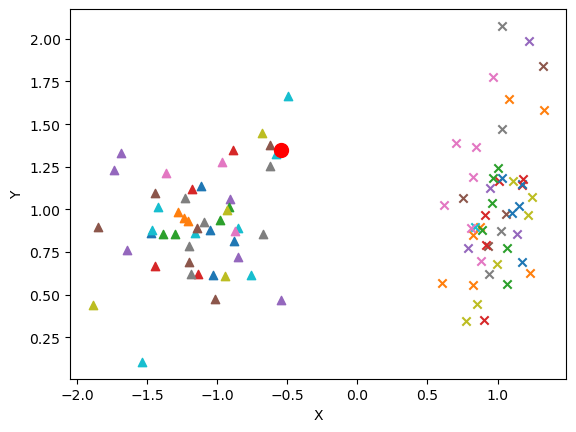

[(0.0, (-1.0494863822738634, 0.8786438023828849), 1),
 (0.0645, (-1.0923082765348864, 0.9268698101370234), 1),
 (0.0869, (-0.9843772463017403, 0.9362112464079575), 1),
 (0.0982, (-1.1472282644315164, 0.8886114568841085), 1),
 (0.1087, (-1.1564950314268887, 0.8598237505632118), 1)]


In [7]:
node = agent.df.iloc[0]['node']
res = agent.knn_predict([node])
pprint(res)


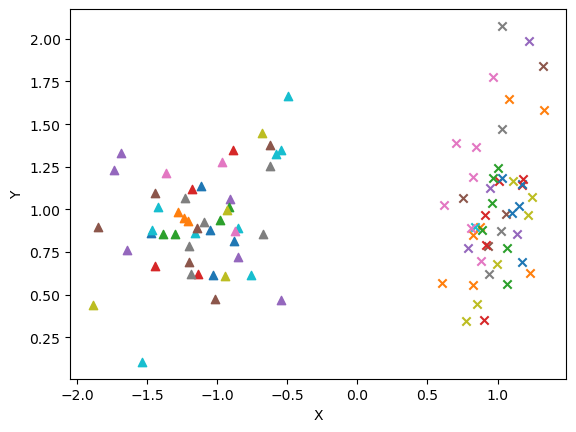

In [8]:
# logistic regression
# Set up data
# optional parameter: dataToProcess => [features,labels]
# default: returns x,y,labels
x,y,labels = agent.prepare_df()
agent.df.head(5)
shapes = {0:'x',1:'^'}

fig, ax = plt.subplots()
for i in range(len(x)):
    ax.scatter(x[i], y[i], marker=shapes[labels[i]])

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [9]:
weights = agent.logistic_regression(labels)
print(agent.weights.shape)
print(len(agent.features))

AttributeError: 'NoneType' object has no attribute 'shape'

In [10]:
#pprint(agent.weights)
meow = list(zip(np.round(agent.features,2), np.round(agent.weights,2)))
pprint(meow[0:5])
print(agent.features)

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [ ]:
agent.df.head(5)


,x,y,label,node
0,-1.049486,0.878644,1,<stats.point object at 0x7fc4e5489cd0>
1,0.878099,0.895511,0,<stats.point object at 0x7fc4e5489eb0>
2,0.959288,1.039673,0,<stats.point object at 0x7fc4e5d44190>
3,-1.180134,1.120622,1,<stats.point object at 0x7fc4e5f3f190>
4,-0.907318,1.060409,1,<stats.point object at 0x7fc4964ed460>


In [ ]:
x,y = agent.create_correlated_vectors(1000,0.86)

df_correlation = pd.DataFrame( 
    list(
        zip(
            np.round(x,2),
            np.round(y,2)
            )
        ),
    columns =['x','y'])

agent_cor = stats.formulas(df_correlation)
agent_cor.df.head(5)
np.corrcoef(x,y)


array([[1.        , 0.88240495],
       [0.88240495, 1.        ]])

m = 0.8919400509547131 
b = 0.03410847613322732


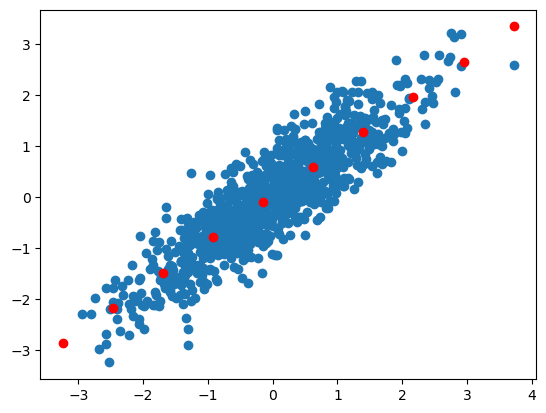

array([-2.85577729, -2.16601032, -1.47624334, -0.78647637, -0.0967094 ,
        0.59305757,  1.28282455,  1.97259152,  2.66235849,  3.35212547])

In [ ]:
agent_cor.set_x_y('x','y')
agent_cor.linear_regression()